<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Daten-einladen" data-toc-modified-id="Daten-einladen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Daten einladen</a></span></li><li><span><a href="#Daten-anschauen" data-toc-modified-id="Daten-anschauen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Daten anschauen</a></span></li><li><span><a href="#Ein-Teil-der-Daten-mal-plotten" data-toc-modified-id="Ein-Teil-der-Daten-mal-plotten-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ein Teil der Daten mal plotten</a></span></li><li><span><a href="#Daten-vorverarbeiten" data-toc-modified-id="Daten-vorverarbeiten-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Daten vorverarbeiten</a></span></li><li><span><a href="#Ein-MLP-in-Keras-zusammenbauen" data-toc-modified-id="Ein-MLP-in-Keras-zusammenbauen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ein MLP in Keras zusammenbauen</a></span></li><li><span><a href="#Testen-des-MLPs" data-toc-modified-id="Testen-des-MLPs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Testen des MLPs</a></span></li></ul></div>

# Daten einladen

In [1]:
import pandas as pd
train_data = pd.read_csv("daten/train.csv")

# Daten anschauen

In [2]:
train_data[0:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train_data.shape)

(1460, 81)


# Ein Teil der Daten mal plotten

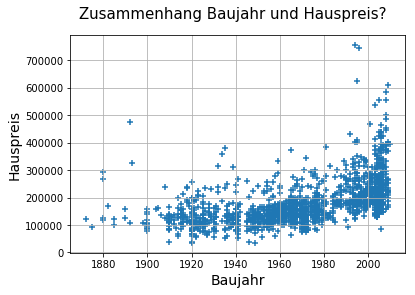

In [4]:
yearbuilt_column = train_data["YearBuilt"].values
saleprice_column = train_data["SalePrice"].values

import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Zusammenhang Baujahr und Hauspreis?", fontsize=15)
plt.scatter(yearbuilt_column, saleprice_column, marker="+")
plt.grid(True)
plt.xlabel("Baujahr", fontsize=14)
plt.ylabel("Hauspreis", fontsize=14)
plt.show()

# Daten vorverarbeiten

In [6]:
# Fülle leere Einträge in den Excel-Tabelle mit Nullen
train_data.fillna(0, inplace=True)

# Nur numerische Spalten sollen verwendet werden
train_data = train_data.select_dtypes(exclude=['object'])

# Skalierung der Input- und Outputdaten
import numpy as np
from sklearn.preprocessing import MinMaxScaler

train_input_matrix = train_data.values[:,1:37]
train_output_matrix = train_data.values[:,37]
train_output_matrix = train_output_matrix.reshape(-1,1)

scaler_input_features = MinMaxScaler(feature_range=(0, 1))
normalized_train_input_matrix = scaler_input_features.fit_transform(train_input_matrix)

scaler_saleprice = MinMaxScaler(feature_range=(0, 1))
normalized_train_output_matrix = scaler_saleprice.fit_transform(train_output_matrix)

# Ein MLP in Keras zusammenbauen

In [7]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout
import pandas as pd
import numpy as np

model = Sequential()
model.add(Dense(160, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer='sgd')

X = normalized_train_input_matrix
Y = normalized_train_output_matrix
model.fit(X,Y, validation_split=0.10, epochs=100)

Train on 1314 samples, validate on 146 samples
Epoch 1/100
1314/1314 [==============================] - 0s 164us/step - loss: 0.0148 - val_loss: 0.0072
Epoch 2/100
1314/1314 [==============================] - 0s 38us/step - loss: 0.0085 - val_loss: 0.0065
Epoch 3/100
1314/1314 [==============================] - 0s 38us/step - loss: 0.0078 - val_loss: 0.0060
Epoch 4/100
1314/1314 [==============================] - 0s 45us/step - loss: 0.0072 - val_loss: 0.0056
Epoch 5/100
1314/1314 [==============================] - 0s 50us/step - loss: 0.0067 - val_loss: 0.0052
Epoch 6/100
1314/1314 [==============================] - 0s 44us/step - loss: 0.0062 - val_loss: 0.0047
Epoch 7/100
1314/1314 [==============================] - 0s 35us/step - loss: 0.0059 - val_loss: 0.0044
Epoch 8/100
1314/1314 [==============================] - 0s 35us/step - loss: 0.0056 - val_loss: 0.0043
Epoch 9/100
1314/1314 [==============================] - 0s 35us/step - loss: 0.0053 - val_loss: 0.0040
Epoch 10/100
131

1314/1314 [==============================] - 0s 56us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 79/100
1314/1314 [==============================] - 0s 34us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 80/100
1314/1314 [==============================] - 0s 32us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 81/100
1314/1314 [==============================] - 0s 69us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 82/100
1314/1314 [==============================] - 0s 34us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 83/100
1314/1314 [==============================] - 0s 32us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 84/100
1314/1314 [==============================] - 0s 33us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 85/100
1314/1314 [==============================] - 0s 33us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 86/100
1314/1314 [==============================] - 0s 32us/step - loss: 0.0023 - val_loss: 0.0017
Epoch 87/100
1314/1314 [==============================] - 0s 34us/st

# Testen des MLPs

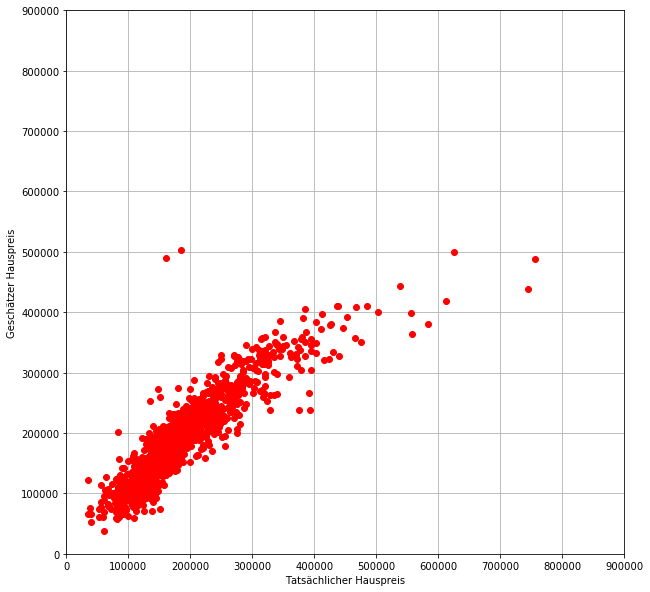

In [8]:
# Hauspreise schätzen
preds_train_houses = model.predict(normalized_train_input_matrix)
preds_train_houses_dollar = scaler_saleprice.inverse_transform(preds_train_houses)

# Tatsächliche und geschätzte Hauspreise gegeneinander
# plotten
plt.figure( figsize=(10,10) )
plt.plot(train_output_matrix, preds_train_houses_dollar, 'ro')
plt.xlabel('Tatsächlicher Hauspreis', fontsize = 10)
plt.ylabel('Geschätzer Hauspreis', fontsize = 10)
plt.grid(True)
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.show()

In [9]:
absdiff = np.abs(preds_train_houses_dollar - train_output_matrix)
average_error_in_dollar = np.mean(absdiff)
print("Durchschnittliche Abweichung in $:", average_error_in_dollar)

Durchschnittliche Abweichung in $: 22034.5080051
